In [1]:
# Original source from following
# Edited by Young Seok Kim

# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Automatically created module for IPython interactive environment


In [9]:
import pickle

# Original 75 data
with open("input_data/input_data.pkl", "rb") as f:
    X, y = pickle.load(f)
print(X.shape)
print(y.shape)

(75, 3)
(75,)


In [3]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

linearly_separable = (X, y)

In [4]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(75, 3)
<class 'numpy.ndarray'>
(75,)
<class 'numpy.ndarray'>


Nearest Neighbors
accuracy : 0.6957
Linear SVM
accuracy : 0.3913
RBF SVM
accuracy : 0.6522
Gaussian Process
accuracy : 0.3913
Decision Tree
accuracy : 0.5652
Random Forest
accuracy : 0.6087
Neural Net
accuracy : 0.3913
AdaBoost
accuracy : 0.4348
Naive Bayes
accuracy : 0.3478
QDA
accuracy : 0.4348


/home/tonykim/Developer/CS408-CSProject/env/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


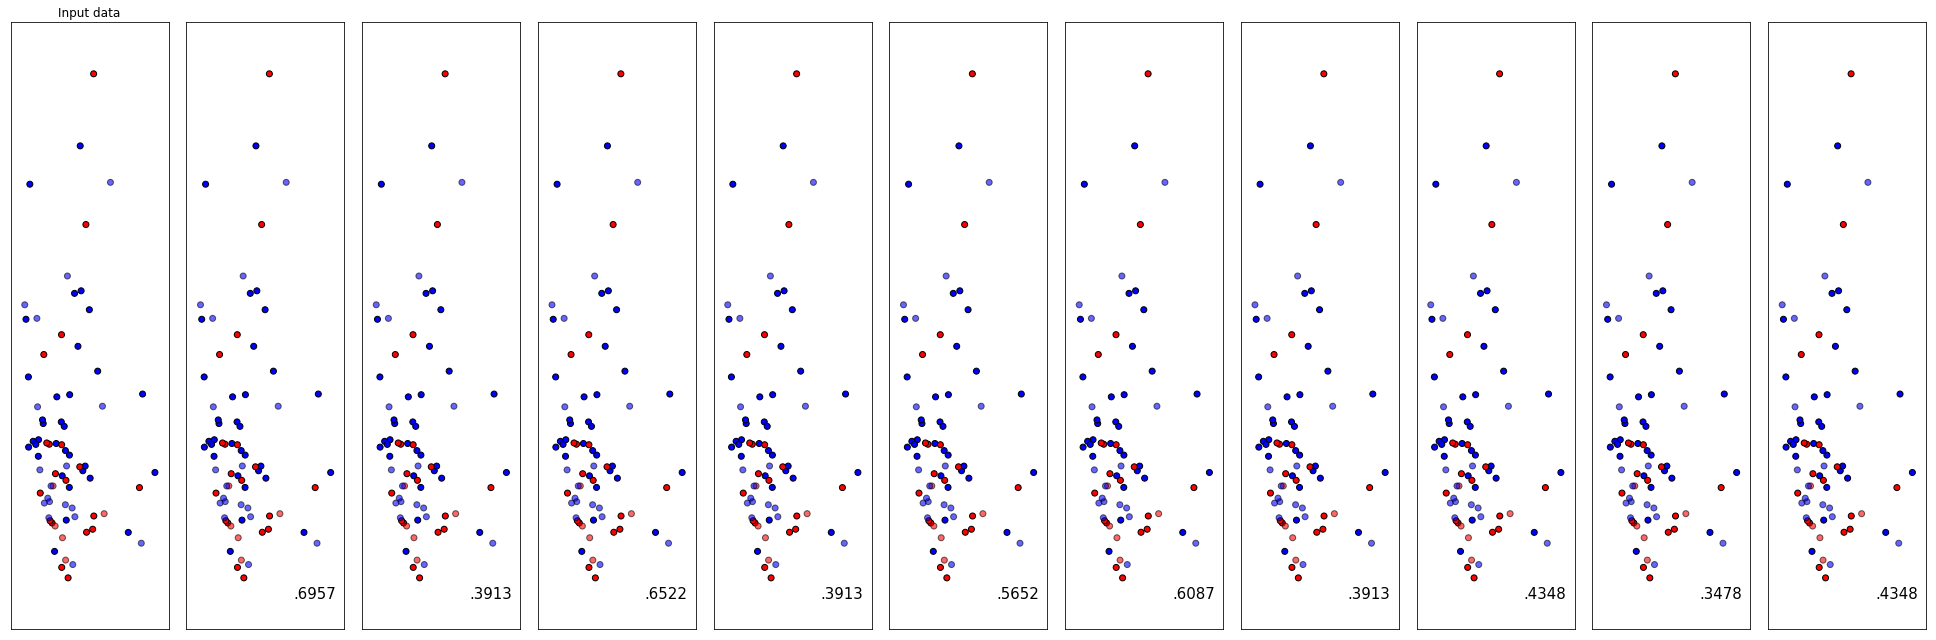

In [5]:
figure = plt.figure(figsize=(27, 9))
i = 1

# preprocess dataset, split into training and test part
#X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.4f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
    print(name)
    print('accuracy : %.4f' % score)

plt.tight_layout()
plt.show()

In [8]:
from sklearn_porter import Porter
porter = Porter(classifiers[0], language='java')
output = porter.export(embed_data=True)
print(output)

import java.util.*;

class KNeighborsClassifier {

    private int nNeighbors;
    private int nTemplates;
    private int nClasses;
    private double power;
    private double[][] X;
    private int[] y;

    public KNeighborsClassifier(int nNeighbors, int nClasses, double power, double[][] X, int[] y) {
        this.nNeighbors = nNeighbors;
        this.nTemplates = y.length;
        this.nClasses = nClasses;
        this.power = power;
        this.X = X;
        this.y = y;
    }

    private static class Neighbor {
        Integer clazz;
        Double dist;
        public Neighbor(int clazz, double dist) {
            this.clazz = clazz;
            this.dist = dist;
        }
    }

    private static double compute(double[] temp, double[] cand, double q) {
        double dist = 0.;
        double diff;
        for (int i = 0, l = temp.length; i < l; i++) {
    	    diff = Math.abs(temp[i] - cand[i]);
    	    if (q==1) {
    	        dist += diff;
    	    } else if (q==2) {
 